In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sys
#import uproot
#from b2plot import hist
#import b2plot as bp
import ROOT

px = 1/plt.rcParams['figure.dpi']
plt.style.use('belle2_modern')

Welcome to JupyROOT 6.26/04


In [5]:
from ROOT import TLorentzVector, TObject
from ROOT import Math, TFile
from array import array 

In [2]:
input_path = sys.argv[1]

In [ ]:
myfile = TFile(input_path, 'update')

In [ ]:
mytree = myfile.omega

In [7]:

Math.Cross()

TypeError: Template method resolution failed:
  Failed to instantiate "Cross()"

In [211]:
Lab_Pi0 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Pi0_px, Pi0_py, Pi0_pz, Pi0_E)
Lab_gamma1 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(g1_px, g1_py, g1_pz, g1_E)
Lab_gamma2 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(g2_px, g2_py, g2_pz, g2_E)

frame = Lab_Pi0 
cm = frame.BoostToCM()

boosted_Pi0 = ROOT.Math.VectorUtil.boost(Lab_Pi0, cm)
boosted_gamma1 = ROOT.Math.VectorUtil.boost(Lab_gamma1 , cm)
boosted_gamma2 = ROOT.Math.VectorUtil.boost(Lab_gamma2 , cm)

In [212]:
# boostframe_Pi0_Px = boosted_Pi0.Px()
# boostframe_Pi0_Py = boosted_Pi0.Py()
# boostframe_Pi0_Pz = boosted_Pi0.Pz()

In [213]:
def print_4_momentum(x,y,z,E,comment=None):
    
    script = comment + "4 momentum Px,Py,Pz,E = " + str(x) + "," + str(y) + ","+ str(z) + ","+ str(E)
    
    
    return print(script)

lab_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,2.0,2.732050807568877
lab_gamma_1,4 momentum Px,Py,Pz,E = 0.0,-0.8660254037844386,0.5,1.0
boosted_gamma_1,4 momentum Px,Py,Pz,E = 0.0,-0.8660254037844386,-0.3406250193166067,0.9306048591020997
boosted_gamma_2,4 momentum Px,Py,Pz,E = 0.0,0.8660254037844386,0.34062501931660694,0.9306048591020993
boosted_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,0.0,1.8612097182041991


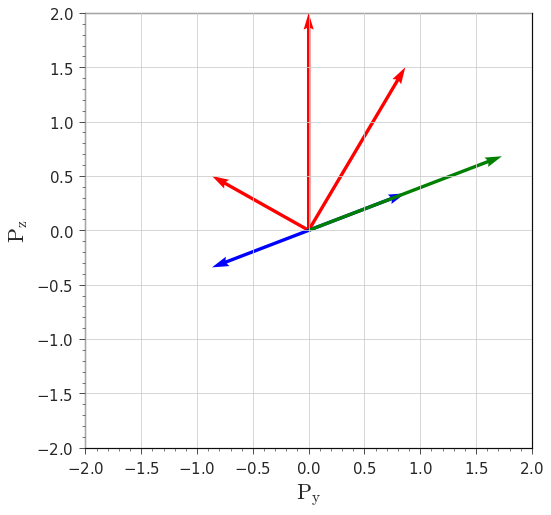

In [214]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
#ax.set_zlim([-8,2])

# ax.set_xlim([-0.5,0.5])
# ax.set_ylim([-0.5,0.5])

start = [0,0,0]
ax.quiver(start[1],start[2],  Lab_Pi0.Py(),Lab_Pi0.Pz() ,angles='xy', scale_units='xy', scale=1, color='r' )
ax.quiver(start[1],start[2], Lab_gamma1.Py(),Lab_gamma1.Pz() , color='r' ,angles='xy', scale_units='xy', scale=1,)
ax.quiver(start[1],start[2], Lab_gamma2.Py(),Lab_gamma2.Pz() , color='r' ,angles='xy', scale_units='xy', scale=1,)


ax.quiver(start[1],start[2], boosted_gamma1.Py(),boosted_gamma1.Pz() ,color='b',angles='xy', scale_units='xy', scale=1, )
ax.quiver(start[1],start[2], boosted_gamma2.Py(),boosted_gamma2.Pz() ,color='b',angles='xy', scale_units='xy', scale=1, )
ax.quiver(start[1],start[2],  boosted_gamma2.Py()-boosted_gamma1.Py(),boosted_gamma2.Pz()-boosted_gamma1.Pz(),color='g' ,angles='xy', scale_units='xy', scale=1, )

plt.grid(True)
ax.set_xlabel(r'$\mathrm{P_y}$')
ax.set_ylabel(r'$\mathrm{P_z}$')

print_4_momentum( Lab_Pi0.Px(), Lab_Pi0.Py(),Lab_Pi0.Pz(), Lab_Pi0.E(), 'lab_pi0,')
print_4_momentum( Lab_gamma1.Px(), Lab_gamma1.Py(),Lab_gamma1.Pz(), Lab_gamma1.E(), 'lab_gamma_1,')



print_4_momentum( boosted_gamma1.Px(), boosted_gamma1.Py(),boosted_gamma1.Pz(), boosted_gamma1.E(), 'boosted_gamma_1,')
print_4_momentum( boosted_gamma2.Px(), boosted_gamma2.Py(),boosted_gamma2.Pz(), boosted_gamma2.E(), 'boosted_gamma_2,')

print_4_momentum( boosted_Pi0.Px(), boosted_Pi0.Py(),boosted_Pi0.Pz(), boosted_Pi0.E(), 'boosted_pi0,')

lab_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,2.0,2.732050807568877
lab_gamma_1,4 momentum Px,Py,Pz,E = 0.0,-0.8660254037844386,0.5,1.0
boosted_gamma_1,4 momentum Px,Py,Pz,E = 0.0,-0.8660254037844386,-0.3406250193166067,0.9306048591020997
boosted_gamma_2,4 momentum Px,Py,Pz,E = 0.0,0.8660254037844386,0.34062501931660694,0.9306048591020993
boosted_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,0.0,1.8612097182041991


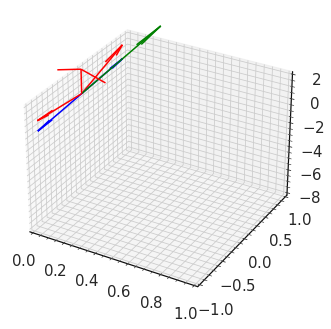

In [215]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.set_xlim([0,1])
ax.set_ylim([-1,1])
ax.set_zlim([-8,2])

start = [0,0,0]
ax.quiver(start[0],start[1],start[2], Lab_Pi0.Px(), Lab_Pi0.Py(),Lab_Pi0.Pz() , color='r' )
ax.quiver(start[0],start[1],start[2], Lab_gamma1.Px(), Lab_gamma1.Py(),Lab_gamma1.Pz() , color='r' )
ax.quiver(start[0],start[1],start[2], Lab_gamma2.Px(), Lab_gamma2.Py(),Lab_gamma2.Pz() , color='r' )


ax.quiver(start[0],start[1],start[2], boosted_gamma1.Px(), boosted_gamma1.Py(),boosted_gamma1.Pz() ,color='b' )
ax.quiver(start[0],start[1],start[2], boosted_gamma2.Px(), boosted_gamma2.Py(),boosted_gamma2.Pz() ,color='b' )
ax.quiver(start[0],start[1],start[2], boosted_gamma2.Px()-boosted_gamma1.Px(), boosted_gamma2.Py()-boosted_gamma1.Py(),boosted_gamma2.Pz()-boosted_gamma1.Pz(),color='g'  )
print_4_momentum( Lab_Pi0.Px(), Lab_Pi0.Py(),Lab_Pi0.Pz(), Lab_Pi0.E(), 'lab_pi0,')
print_4_momentum( Lab_gamma1.Px(), Lab_gamma1.Py(),Lab_gamma1.Pz(), Lab_gamma1.E(), 'lab_gamma_1,')



print_4_momentum( boosted_gamma1.Px(), boosted_gamma1.Py(),boosted_gamma1.Pz(), boosted_gamma1.E(), 'boosted_gamma_1,')
print_4_momentum( boosted_gamma2.Px(), boosted_gamma2.Py(),boosted_gamma2.Pz(), boosted_gamma2.E(), 'boosted_gamma_2,')

print_4_momentum( boosted_Pi0.Px(), boosted_Pi0.Py(),boosted_Pi0.Pz(), boosted_Pi0.E(), 'boosted_pi0,')

In [216]:
Pi0_px = 0
Pi0_py = 0
Pi0_pz = 2
Pi0_E  = 1+math.sqrt(3)


g2_px = 0
g2_py = -math.sqrt(3)/2
g2_pz = 0.5

g2_E = 1

g1_px = 0
g1_py = math.sqrt(3)/2
g1_pz = 1.5

g1_E = math.sqrt(3)

In [217]:
Lab_Pi0 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Pi0_px, Pi0_py, Pi0_pz, Pi0_E)
Lab_gamma1 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(g1_px, g1_py, g1_pz, g1_E)
Lab_gamma2 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(g2_px, g2_py, g2_pz, g2_E)

frame = Lab_Pi0 
cm = frame.BoostToCM()

boosted_Pi0 = ROOT.Math.VectorUtil.boost(Lab_Pi0, cm)
boosted_gamma1 = ROOT.Math.VectorUtil.boost(Lab_gamma1 , cm)
boosted_gamma2 = ROOT.Math.VectorUtil.boost(Lab_gamma2 , cm)

lab_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,2.0,2.732050807568877
lab_gamma_1,4 momentum Px,Py,Pz,E = 0.0,0.8660254037844386,1.5,1.7320508075688772
boosted_gamma_1,4 momentum Px,Py,Pz,E = 0.0,0.8660254037844386,0.34062501931660694,0.9306048591020993
boosted_gamma_2,4 momentum Px,Py,Pz,E = 0.0,-0.8660254037844386,-0.3406250193166067,0.9306048591020997
boosted_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,0.0,1.8612097182041991


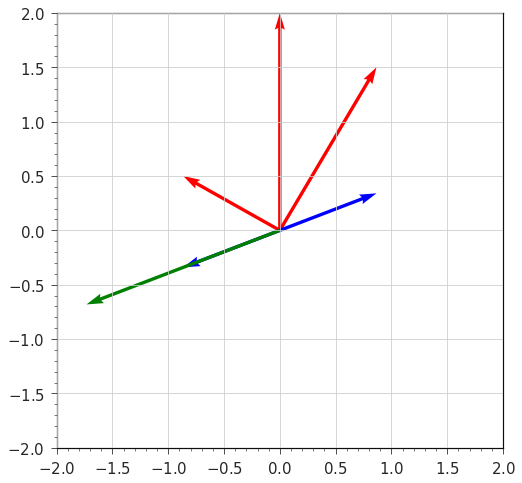

In [218]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
#ax.set_zlim([-8,2])

start = [0,0,0]
ax.quiver(start[1],start[2],  Lab_Pi0.Py(),Lab_Pi0.Pz() ,angles='xy', scale_units='xy', scale=1, color='r' )
ax.quiver(start[1],start[2], Lab_gamma1.Py(),Lab_gamma1.Pz() , color='r' ,angles='xy', scale_units='xy', scale=1,)
ax.quiver(start[1],start[2], Lab_gamma2.Py(),Lab_gamma2.Pz() , color='r' ,angles='xy', scale_units='xy', scale=1,)


ax.quiver(start[1],start[2], boosted_gamma1.Py(),boosted_gamma1.Pz() ,color='b',angles='xy', scale_units='xy', scale=1, )
ax.quiver(start[1],start[2], boosted_gamma2.Py(),boosted_gamma2.Pz() ,color='b',angles='xy', scale_units='xy', scale=1, )
ax.quiver(start[1],start[2],  boosted_gamma2.Py()-boosted_gamma1.Py(),boosted_gamma2.Pz()-boosted_gamma1.Pz(),color='g' ,angles='xy', scale_units='xy', scale=1, )

plt.grid(True)
print_4_momentum( Lab_Pi0.Px(), Lab_Pi0.Py(),Lab_Pi0.Pz(), Lab_Pi0.E(), 'lab_pi0,')
print_4_momentum( Lab_gamma1.Px(), Lab_gamma1.Py(),Lab_gamma1.Pz(), Lab_gamma1.E(), 'lab_gamma_1,')



print_4_momentum( boosted_gamma1.Px(), boosted_gamma1.Py(),boosted_gamma1.Pz(), boosted_gamma1.E(), 'boosted_gamma_1,')
print_4_momentum( boosted_gamma2.Px(), boosted_gamma2.Py(),boosted_gamma2.Pz(), boosted_gamma2.E(), 'boosted_gamma_2,')

print_4_momentum( boosted_Pi0.Px(), boosted_Pi0.Py(),boosted_Pi0.Pz(), boosted_Pi0.E(), 'boosted_pi0,')

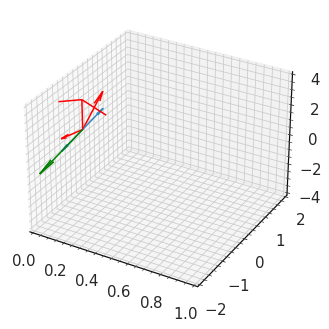

In [219]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.set_xlim([0,1])
ax.set_ylim([-2,2])
ax.set_zlim([-4,4])

start = [0,0,0]
ax.quiver(start[0],start[1],start[2], Lab_Pi0.Px(), Lab_Pi0.Py(),Lab_Pi0.Pz() , color='r' )
ax.quiver(start[0],start[1],start[2], Lab_gamma1.Px(), Lab_gamma1.Py(),Lab_gamma1.Pz() , color='r' )
ax.quiver(start[0],start[1],start[2], Lab_gamma2.Px(), Lab_gamma2.Py(),Lab_gamma2.Pz() , color='r' )


ax.quiver(start[0],start[1],start[2], boosted_gamma1.Px(), boosted_gamma1.Py(),boosted_gamma1.Pz()  )
ax.quiver(start[0],start[1],start[2], boosted_gamma2.Px(), boosted_gamma2.Py(),boosted_gamma2.Pz()  )


ax.quiver(start[0],start[1],start[2], boosted_gamma2.Px()-boosted_gamma1.Px(), boosted_gamma2.Py()-boosted_gamma1.Py(),boosted_gamma2.Pz()-boosted_gamma1.Pz(),color='g'  )


In [220]:
Pi0_px = 0
Pi0_py = 0
Pi0_pz = 2
Pi0_E  = math.sqrt(2) +math.sqrt(2)


g2_px = 0
g2_py = -1
g2_pz = 1

g2_E = math.sqrt(2)

g1_px = 0
g1_py = +1
g1_pz = 1

g1_E = math.sqrt(2)

In [221]:
Lab_Pi0 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Pi0_px, Pi0_py, Pi0_pz, Pi0_E)
Lab_gamma1 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(g1_px, g1_py, g1_pz, g1_E)
Lab_gamma2 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(g2_px, g2_py, g2_pz, g2_E)

frame = Lab_Pi0 
cm = frame.BoostToCM()

boosted_Pi0 = ROOT.Math.VectorUtil.boost(Lab_Pi0, cm)
boosted_gamma1 = ROOT.Math.VectorUtil.boost(Lab_gamma1 , cm)
boosted_gamma2 = ROOT.Math.VectorUtil.boost(Lab_gamma2 , cm)

lab_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,2.0,2.8284271247461903
lab_gamma_1,4 momentum Px,Py,Pz,E = 0.0,1.0,1.0,1.4142135623730951
boosted_gamma_1,4 momentum Px,Py,Pz,E = 0.0,1.0,0.0,1.0000000000000002
boosted_gamma_2,4 momentum Px,Py,Pz,E = 0.0,-1.0,0.0,1.0000000000000002
boosted_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,0.0,2.0000000000000004


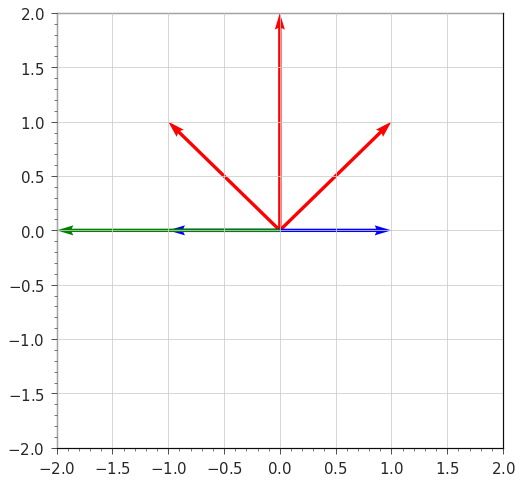

In [222]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
#ax.set_zlim([-8,2])

start = [0,0,0]
ax.quiver(start[1],start[2],  Lab_Pi0.Py(),Lab_Pi0.Pz() ,angles='xy', scale_units='xy', scale=1, color='r' )
ax.quiver(start[1],start[2], Lab_gamma1.Py(),Lab_gamma1.Pz() , color='r' ,angles='xy', scale_units='xy', scale=1,)
ax.quiver(start[1],start[2], Lab_gamma2.Py(),Lab_gamma2.Pz() , color='r' ,angles='xy', scale_units='xy', scale=1,)


ax.quiver(start[1],start[2], boosted_gamma1.Py(),boosted_gamma1.Pz() ,color='b',angles='xy', scale_units='xy', scale=1, )
ax.quiver(start[1],start[2], boosted_gamma2.Py(),boosted_gamma2.Pz() ,color='b',angles='xy', scale_units='xy', scale=1, )
ax.quiver(start[1],start[2],  boosted_gamma2.Py()-boosted_gamma1.Py(),boosted_gamma2.Pz()-boosted_gamma1.Pz(),color='g' ,angles='xy', scale_units='xy', scale=1, )

plt.grid(True)
print_4_momentum( Lab_Pi0.Px(), Lab_Pi0.Py(),Lab_Pi0.Pz(), Lab_Pi0.E(), 'lab_pi0,')
print_4_momentum( Lab_gamma1.Px(), Lab_gamma1.Py(),Lab_gamma1.Pz(), Lab_gamma1.E(), 'lab_gamma_1,')



print_4_momentum( boosted_gamma1.Px(), boosted_gamma1.Py(),boosted_gamma1.Pz(), boosted_gamma1.E(), 'boosted_gamma_1,')
print_4_momentum( boosted_gamma2.Px(), boosted_gamma2.Py(),boosted_gamma2.Pz(), boosted_gamma2.E(), 'boosted_gamma_2,')

print_4_momentum( boosted_Pi0.Px(), boosted_Pi0.Py(),boosted_Pi0.Pz(), boosted_Pi0.E(), 'boosted_pi0,')

In [227]:
Pi0_px = 0
Pi0_py = 0
Pi0_pz = 2
Pi0_E  = math.sqrt(2) *  2


g2_px = 0
g2_py = -1
g2_pz = 1

g2_E = math.sqrt(2)

g1_px = 0
g1_py = +1
g1_pz = 1

g1_E = math.sqrt(2)

In [228]:
Lab_Pi0 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Pi0_px, Pi0_py, Pi0_pz, Pi0_E)
Lab_gamma1 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(g1_px, g1_py, g1_pz, g1_E)
Lab_gamma2 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(g2_px, g2_py, g2_pz, g2_E)

frame = Lab_Pi0 
cm = frame.BoostToCM()

boosted_Pi0 = ROOT.Math.VectorUtil.boost(Lab_Pi0, cm)
boosted_gamma1 = ROOT.Math.VectorUtil.boost(Lab_gamma1 , cm)
boosted_gamma2 = ROOT.Math.VectorUtil.boost(Lab_gamma2 , cm)

lab_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,2.0,2.8284271247461903
lab_gamma_1,4 momentum Px,Py,Pz,E = 0.0,1.0,1.0,1.4142135623730951
boosted_gamma_1,4 momentum Px,Py,Pz,E = 0.0,1.0,0.0,1.0000000000000002
boosted_gamma_2,4 momentum Px,Py,Pz,E = 0.0,-1.0,0.0,1.0000000000000002
boosted_pi0,4 momentum Px,Py,Pz,E = 0.0,0.0,0.0,2.0000000000000004


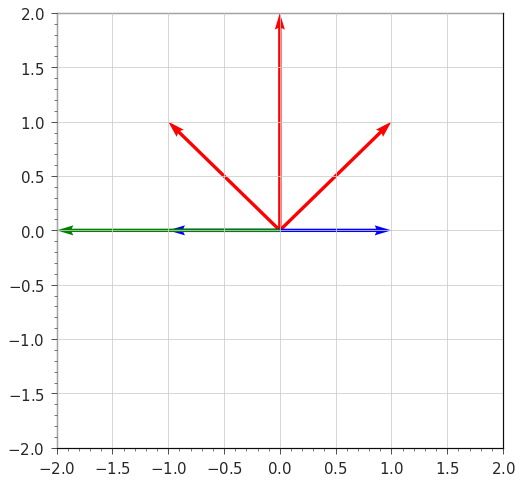

In [229]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
#ax.set_zlim([-8,2])

start = [0,0,0]
ax.quiver(start[1],start[2],  Lab_Pi0.Py(),Lab_Pi0.Pz() ,angles='xy', scale_units='xy', scale=1, color='r' )
ax.quiver(start[1],start[2], Lab_gamma1.Py(),Lab_gamma1.Pz() , color='r' ,angles='xy', scale_units='xy', scale=1,)
ax.quiver(start[1],start[2], Lab_gamma2.Py(),Lab_gamma2.Pz() , color='r' ,angles='xy', scale_units='xy', scale=1,)


ax.quiver(start[1],start[2], boosted_gamma1.Py(),boosted_gamma1.Pz() ,color='b',angles='xy', scale_units='xy', scale=1, )
ax.quiver(start[1],start[2], boosted_gamma2.Py(),boosted_gamma2.Pz() ,color='b',angles='xy', scale_units='xy', scale=1, )
ax.quiver(start[1],start[2],  boosted_gamma2.Py()-boosted_gamma1.Py(),boosted_gamma2.Pz()-boosted_gamma1.Pz(),color='g' ,angles='xy', scale_units='xy', scale=1, )

plt.grid(True)
print_4_momentum( Lab_Pi0.Px(), Lab_Pi0.Py(),Lab_Pi0.Pz(), Lab_Pi0.E(), 'lab_pi0,')
print_4_momentum( Lab_gamma1.Px(), Lab_gamma1.Py(),Lab_gamma1.Pz(), Lab_gamma1.E(), 'lab_gamma_1,')



print_4_momentum( boosted_gamma1.Px(), boosted_gamma1.Py(),boosted_gamma1.Pz(), boosted_gamma1.E(), 'boosted_gamma_1,')
print_4_momentum( boosted_gamma2.Px(), boosted_gamma2.Py(),boosted_gamma2.Pz(), boosted_gamma2.E(), 'boosted_gamma_2,')

print_4_momentum( boosted_Pi0.Px(), boosted_Pi0.Py(),boosted_Pi0.Pz(), boosted_Pi0.E(), 'boosted_pi0,')

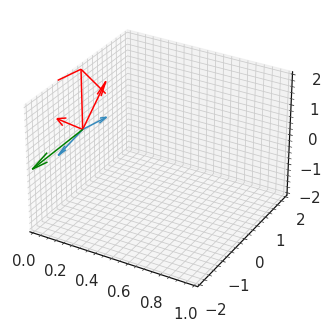

In [226]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.set_xlim([0,1])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

start = [0,0,0]
ax.quiver(start[0],start[1],start[2], Lab_Pi0.Px(), Lab_Pi0.Py(),Lab_Pi0.Pz() , color='r' )
ax.quiver(start[0],start[1],start[2], Lab_gamma1.Px(), Lab_gamma1.Py(),Lab_gamma1.Pz() , color='r' )
ax.quiver(start[0],start[1],start[2], Lab_gamma2.Px(), Lab_gamma2.Py(),Lab_gamma2.Pz() , color='r' )


ax.quiver(start[0],start[1],start[2], boosted_gamma1.Px(), boosted_gamma1.Py(),boosted_gamma1.Pz()  )
ax.quiver(start[0],start[1],start[2], boosted_gamma2.Px(), boosted_gamma2.Py(),boosted_gamma2.Pz()  )


ax.quiver(start[0],start[1],start[2], boosted_gamma2.Px()-boosted_gamma1.Px(), boosted_gamma2.Py()-boosted_gamma1.Py(),boosted_gamma2.Pz()-boosted_gamma1.Pz(),color='g'  )
